In [1]:
# Auto reload
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.insert(0, "../")

In [3]:
import torch
from torchvision.utils import save_image
from torchvision.models import vgg19, VGG19_Weights
from torchvision import transforms

import os
from PIL import Image
import numpy as np

from src.models.model import TransferModel

In [7]:
from matplotlib import pyplot as plt

In [4]:
def get_content_style(
    content_file: str,
    style_file: str,
):
    transformations = transforms.Compose([
        transforms.ToTensor()
    ])

    # Get one random content and style image
    content_image = Image.open(content_file).convert("RGB")
    style_image = Image.open(style_file).convert("RGB")

    content_image = transformations(content_image)
    style_image = transformations(style_image)

    return content_image, style_image

In [11]:
pretrained_weights = '../models/pretrain_model.pth'

device = "cuda" if torch.cuda.is_available() else "cpu"
model = TransferModel(
    base_model=vgg19(weights=VGG19_Weights.DEFAULT),
    pretrained_weights=pretrained_weights,
    mode="style_transfer",

    alpha=1.0,
    algo='ae',
    distance="cosine",
)
model.to(device)
model.eval()

TransferModel(
  (encoder): Encoder(
    (block_layers): ModuleList(
      (0): Sequential(
        (preprocess): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
        (2): ReLU(inplace=True)
      )
      (1): Sequential(
        (3): ReflectionPad2d((1, 1, 1, 1))
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (5): ReLU(inplace=True)
        (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (7): ReflectionPad2d((1, 1, 1, 1))
        (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
        (9): ReLU(inplace=True)
      )
      (2): Sequential(
        (10): ReflectionPad2d((1, 1, 1, 1))
        (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (12): ReLU(inplace=True)
        (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (14): ReflectionPad2d((1, 1, 1, 1)

## Beta influence

(-0.5, 490.5, 720.5, -0.5)

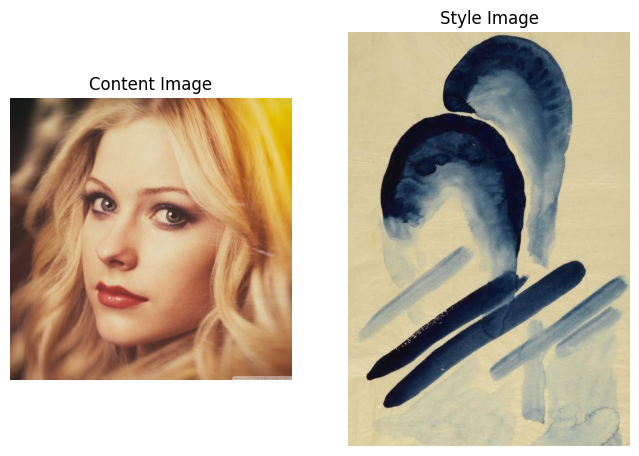

In [12]:
content_path = "../data/content/004.jpg"
style_path = "../data/style/10.jpg"

content_image, style_image = get_content_style(content_path, style_path)
content_image = content_image.unsqueeze(0).to(device)
style_image = style_image.unsqueeze(0).to(device)

# Plot the content and style image
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(content_image.squeeze(0).cpu().numpy().transpose(1, 2, 0))
ax[0].set_title("Content Image")
ax[0].axis("off")

ax[1].imshow(style_image.squeeze(0).cpu().numpy().transpose(1, 2, 0))
ax[1].set_title("Style Image")
ax[1].axis("off")

In [15]:
betas = [0, 1e-2, 1e-1, 0.3, 0.7, 1]
output_images = []

with torch.no_grad():
    for beta in betas:
        model.lambd = beta
        _, output_image , _ = model(content_image, style_image, output_image=True)
        output_image = output_image.squeeze(0).cpu()
        output_images.append(output_image)

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Beta influence with cosine distance')

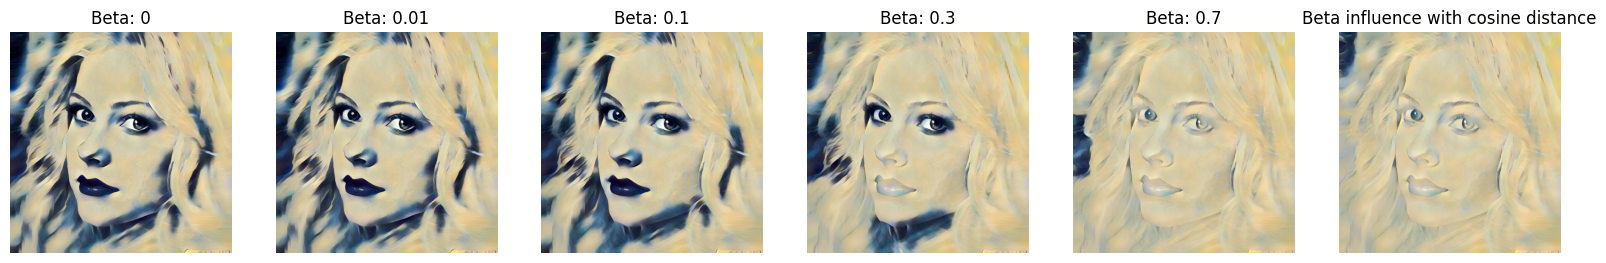

In [ ]:
# Plot the output images
fig, ax = plt.subplots(1, len(betas), figsize=(20, 20))
for i, output_image in enumerate(output_images):
    ax[i].imshow(output_image.numpy().transpose(1, 2, 0))
    ax[i].set_title(f"Beta: {betas[i]}")
    ax[i].axis("off")
plt.title("Beta influence with cosine distance")

In [21]:
betas = [0, 100, 1000]#1e-2, 1e-1, 0.3, 0.7, 1]
output_images = []

model.distance = "euclidean"

with torch.no_grad():
    for beta in betas:
        model.lambd = beta
        _, output_image , _ = model(content_image, style_image, output_image=True)
        output_image = output_image.squeeze(0).cpu()
        output_images.append(output_image)

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0.98, 'Beta influence with euclidean distance')

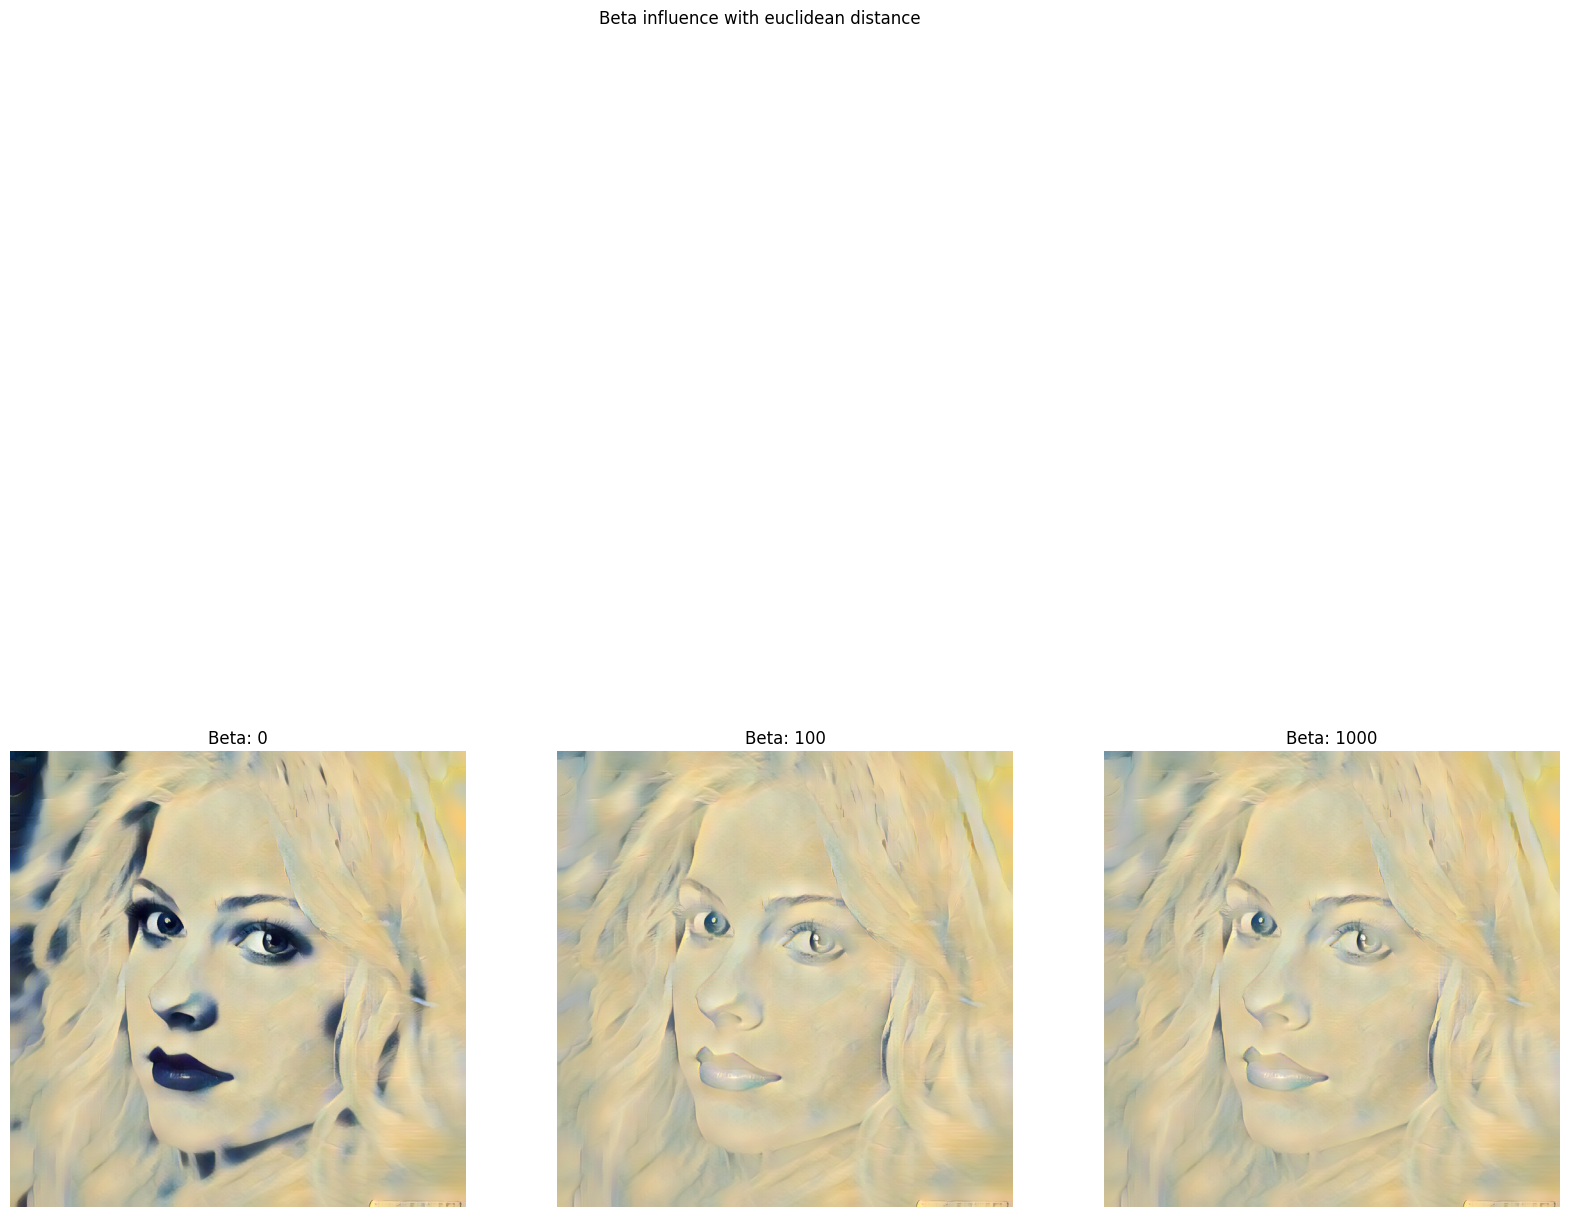

In [22]:
# Plot the output images
fig, ax = plt.subplots(1, len(betas), figsize=(20, 20))
for i, output_image in enumerate(output_images):
    ax[i].imshow(output_image.numpy().transpose(1, 2, 0))
    ax[i].set_title(f"Beta: {betas[i]}")
    ax[i].axis("off")
plt.suptitle("Beta influence with euclidean distance")

## Alpha influence

(-0.5, 1199.5, 831.5, -0.5)

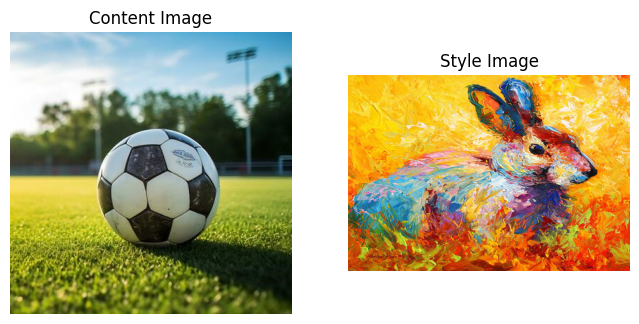

In [28]:
model.beta = 0.01

content_path = "../data/content/ball.jpg"
style_path = "../data/style/horse.jpg"

content_image, style_image = get_content_style(content_path, style_path)
content_image = content_image.unsqueeze(0).to(device)
style_image = style_image.unsqueeze(0).to(device)

# Plot the content and style image
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(content_image.squeeze(0).cpu().numpy().transpose(1, 2, 0))
ax[0].set_title("Content Image")
ax[0].axis("off")

ax[1].imshow(style_image.squeeze(0).cpu().numpy().transpose(1, 2, 0))
ax[1].set_title("Style Image")
ax[1].axis("off")

In [29]:
alphas = [0, 0.3, 0.5, 0.8, 1]
output_images = []

model.beta = 0.01
model.distance = "cosine"

with torch.no_grad():
    for alpha in alphas:
        model.alpha = alpha
        _, output_image , _ = model(content_image, style_image, output_image=True)
        output_image = output_image.squeeze(0).cpu()
        output_images.append(output_image)

  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Alpha influence with cosine distance')

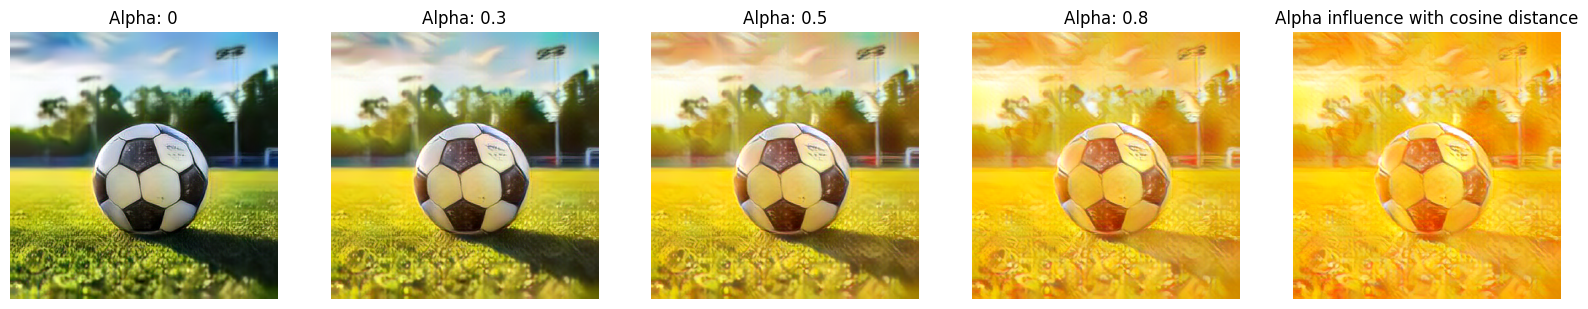

In [30]:
# Plot the output images
fig, ax = plt.subplots(1, len(alphas), figsize=(20, 20))
for i, output_image in enumerate(output_images):
    ax[i].imshow(output_image.numpy().transpose(1, 2, 0))
    ax[i].set_title(f"Alpha: {alphas[i]}")
    ax[i].axis("off")
plt.title("Alpha influence with cosine distance")

In [33]:
alphas = [0, 0.3, 0.5, 0.8, 1]
betas = [0, 1e-2, 1e-1, 0.3, 0.7]
output_images = []

model.distance = "cosine"

with torch.no_grad():
    for alpha in alphas:
        for beta in betas:
            model.alpha = alpha
            model.lambd = beta
            _, output_image , _ = model(content_image, style_image, output_image=True)
            output_image = output_image.squeeze(0).cpu()
            output_images.append(output_image)

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [40]:
def clip_image(image):
    image = np.clip(image, 0, 1)
    return image

Text(0.5, 0.98, 'Alpha and Beta influence with cosine distance')

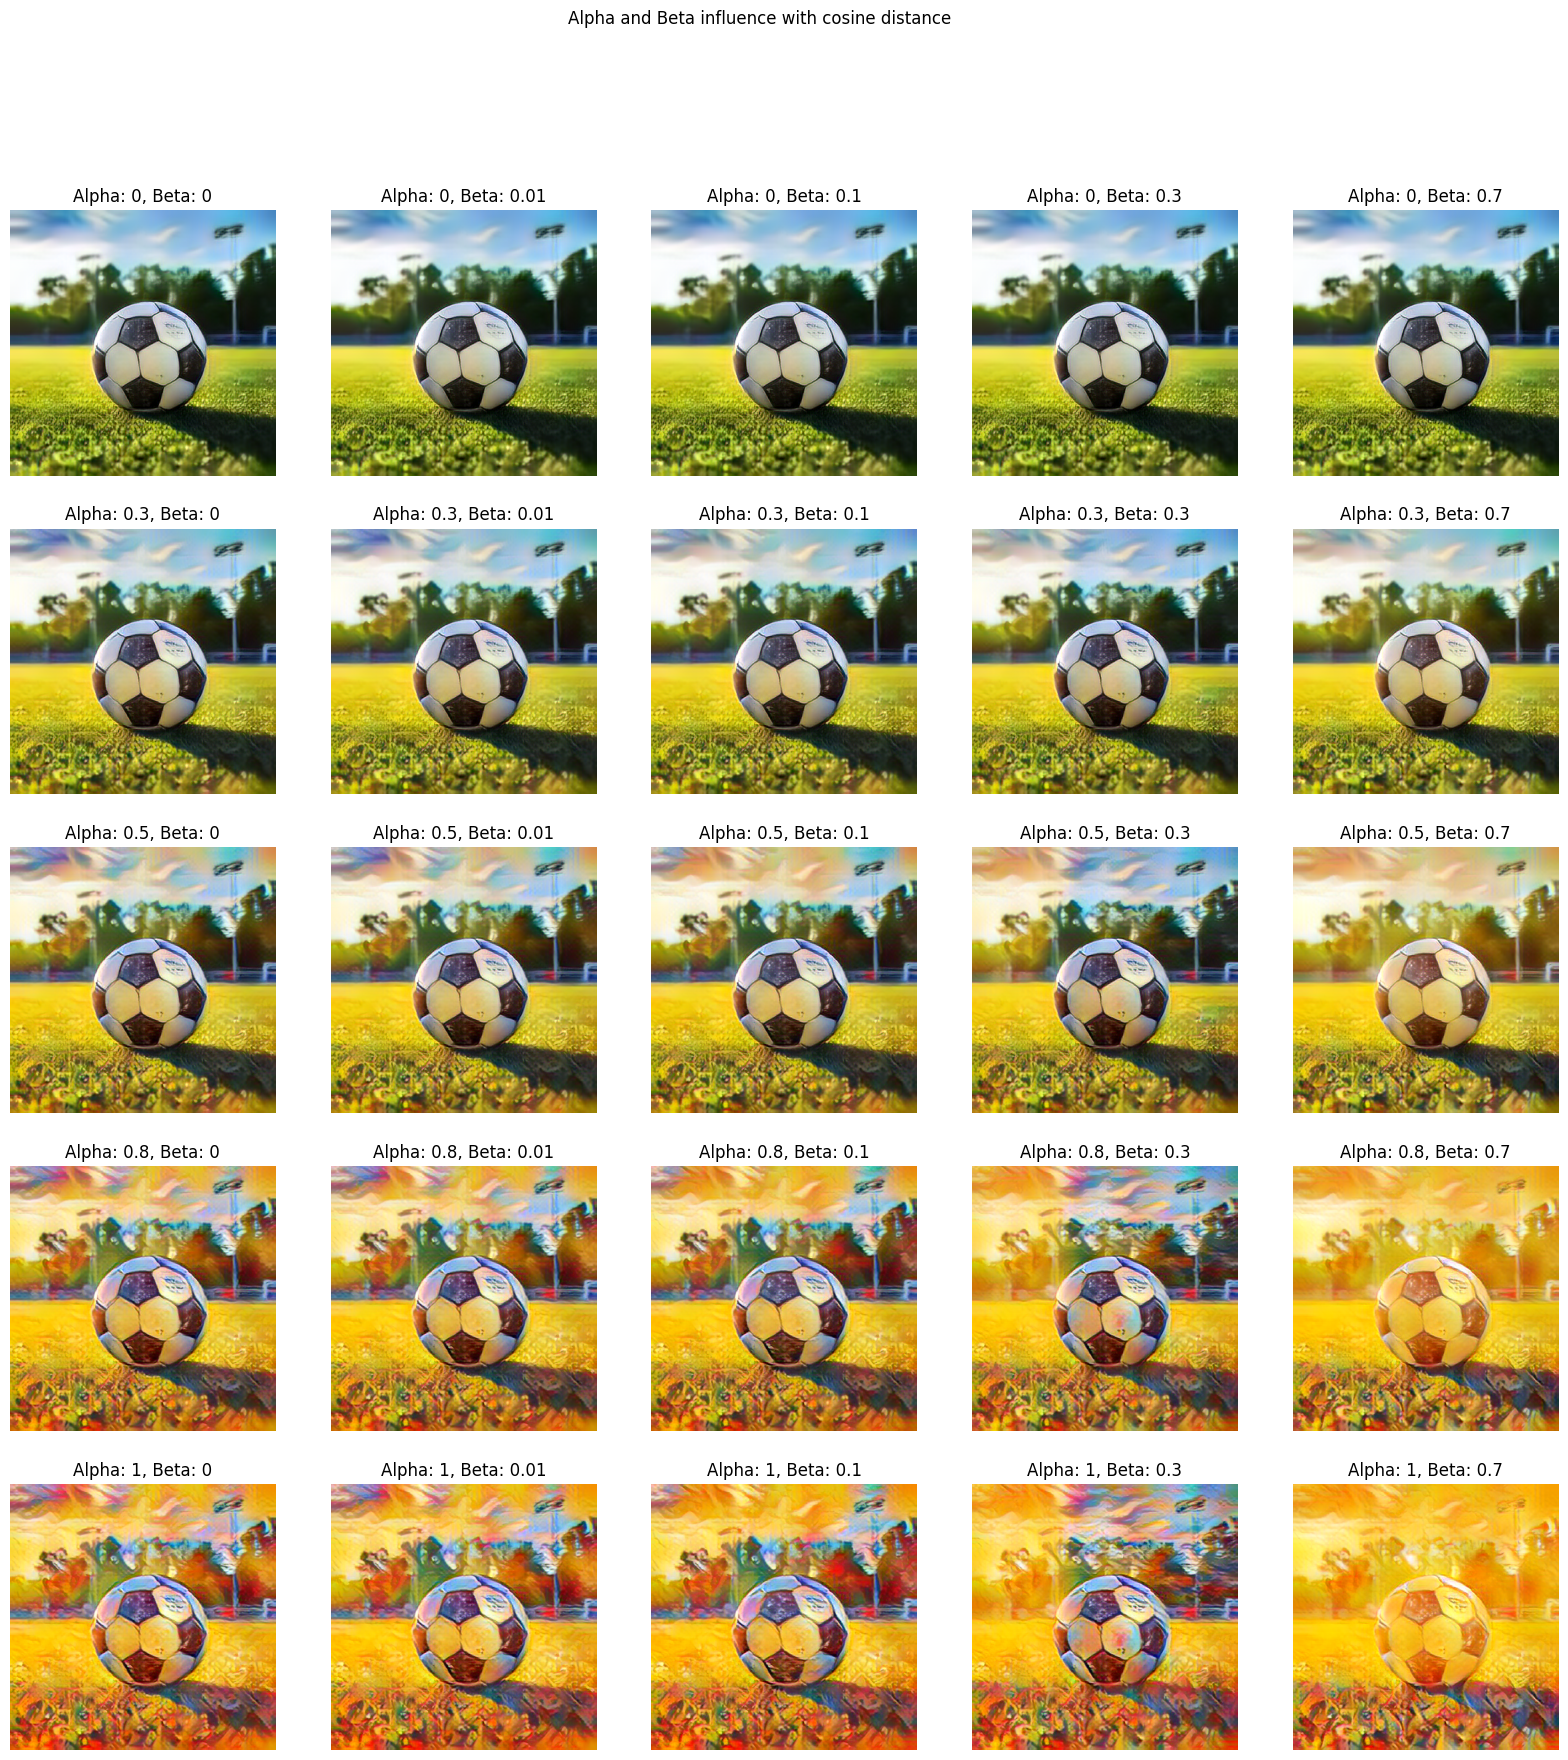

In [41]:
# Plot the output images
fig, ax = plt.subplots(len(alphas), len(betas), figsize=(20, 20))
for i in range(len(alphas)):
    for j in range(len(betas)):
        ax[i, j].imshow(clip_image(output_images[i * len(betas) + j].numpy().transpose(1, 2, 0)))
        ax[i, j].set_title(f"Alpha: {alphas[i]}, Beta: {betas[j]}")
        ax[i, j].axis("off")
plt.suptitle("Alpha and Beta influence with cosine distance")